In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from utils.synthetic_features import temporada_alta
from utils.synthetic_features import periodo_dia

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 8})

In [2]:
df = pd.read_csv('../data/dataset_SCL.csv')

/var/folders/q4/hqn7rgnd2776w9b_lc4r0vlr0000gn/T/ipykernel_4488/3157898594.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/dataset_SCL.csv')


In [3]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
# Transformar variables de fecha de string a datetime
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

# Agregar Variable Fecha
df['fecha'] = df['Fecha-I'].dt.date

In [5]:
?temporada_alta

Signature: temporada_alta(fecha_i, return_values: list = [1, 0])
Docstring:
Determina si la fecha programada del vuelo pertenece a temporada alta.

Temporada Alta:
    1) Entre 15-DIC y 03-MAR
    2) Entre 15-JUL y 31-JUL
    3) Entre 11-SEP y 30-SEP

Parameters
----------
fecha_i : date, datetime, timestamp
    Fecha y hora programada del vuelo 
return_values : list, default:[1,0]
    Lista con la definición de valor verdadero o falso. Si la fecha se encuentra en la definición de
    temporada alta, retorna list[0] de lo contrario list[1]. Por defecto [1,0].

Returns
-------
return_values:
    return_values[0] si la fecha está en temporada alta
    return_values[1] si la fecha no está en temporada alta
File:      ~/workspace/neuralworks-desafio-ds/notebooks/utils/synthetic_features.py
Type:      function

In [6]:
df['temporada_alta'] = df['Fecha-I'].apply(temporada_alta)

In [7]:
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).apply(lambda x: x.total_seconds() / 60)

df['atraso_15'] = df['dif_min'].apply(lambda x: 1 if x>15 else 0)

In [8]:
?periodo_dia

Signature: periodo_dia(fecha_i)
Docstring:
Determina a qué periodo del día (mañana, tarde, noche) pertenece la hora programada del vuelo.

Periodo del Día:
    1) Mañana: entre las 05:00:00 y las 11:59:59
    2) Tarde: entre las 12:00:00 y las 18:59:59
    3) Noche: entre las 19:00:00 y las 04:59:59

Parameters
----------
fecha_i : date, datetime, timestamp
    Fecha y hora programada del vuelo 

Returns
-------
periodo : string
    1) mañana: si fecha_i.hour entre las 05:00:00 y las 11:59:59
    2) tarde: si fecha_i.hour entre las 12:00:00 y las 18:59:59
    3) noche: si fecha_i.hour entre las 19:00:00 y las 04:59:59
File:      ~/workspace/neuralworks-desafio-ds/notebooks/utils/synthetic_features.py
Type:      function

In [9]:
df['periodo_dia'] = df['Fecha-I'].apply(periodo_dia)

In [10]:
df[['temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia']].describe()

,temporada_alta,dif_min,atraso_15
count,68206.000000,68206.000000,68206.000000
mean,0.333724,9.110855,0.184940
std,0.471546,19.313387,0.388252
min,0.000000,-14.000000,0.000000
25%,0.000000,-1.000000,0.000000
50%,0.000000,4.000000,0.000000
75%,1.000000,12.000000,0.000000
max,1.000000,161.000000,1.000000


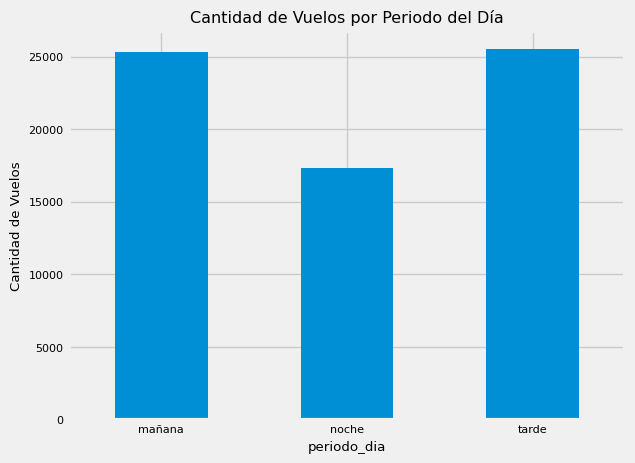

In [11]:
df.groupby('periodo_dia').count()['temporada_alta'].plot(kind='bar', rot=0)
plt.title('Cantidad de Vuelos por Periodo del Día')
plt.ylabel('Cantidad de Vuelos')
plt.show()

In [12]:
# Exportar Variables Creadas
df[['temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia']].to_csv('../data/output/synthetic_features.csv')